In [1]:
# check scikit-learn version
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import os

print(sklearn.__version__)

0.24.1


In [2]:

dir_p = r'C:\Users\Honeyz\Desktop\Aessa\THE_SIS\PyroDataProcessed.csv'
raw_dataset = pd.read_csv(dir_p, skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset


,C% Biomass,H% Biomass,O% Biomass,N% Biomass,C% HDPE,H% HDPE,O% HDPE,N% HDPE,C% PS,H% PS,O% PS,N% PS,Time,Rate,Ratio,Temp,Oil%,Char%,Gas%
0,63.85,8.6,3.74,0.33,85.72,14.28,0,0.00,0.0,0.0,0.0,0,0.50,5,66.7,500,60.160000,10.940000,28.910000
1,63.85,8.6,3.74,0.33,85.72,14.28,0,0.00,0.0,0.0,0.0,0,0.50,5,100.0,500,56.000000,0.000000,44.000000
2,63.85,8.6,3.74,0.33,85.72,14.28,0,0.00,0.0,0.0,0.0,0,0.50,5,50.0,500,45.990000,17.310000,36.690000
3,63.85,8.6,3.74,0.33,85.72,14.28,0,0.00,0.0,0.0,0.0,0,0.50,5,33.3,500,44.040000,23.270000,32.690000
4,63.85,8.6,3.74,0.33,85.72,14.28,0,0.00,0.0,0.0,0.0,0,0.50,5,0.0,500,25.760000,34.440000,39.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,42.07,5.6,52.01,0.26,84.89,14.19,0,0.38,0.0,0.0,0.0,0,0.75,10,84.0,600,79.971379,4.011589,17.274206
193,42.07,5.6,52.01,0.26,84.89,14.19,0,0.38,0.0,0.0,0.0,0,0.75,10,86.0,600,80.447047,3.501431,17.198805
194,42.07,5.6,52.01,0.26,84.89,14.19,0,0.38,0.0,0.0,0.0,0,0.75,10,88.0,600,80.902261,2.988883,17.117902
195,42.07,5.6,52.01,0.26,84.89,14.19,0,0.38,0.0,0.0,0.0,0,0.75,10,90.0,600,81.337020,2.473944,17.029982


In [3]:
#The following script divides data into attributes and labels:
X = dataset.iloc[:, :16].values
y = dataset.iloc[:, 16:].values

#divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# define model
model = DecisionTreeRegressor()
# fit model
model.fit(X_train, y_train)

ValueError: could not convert string to float: 's'

In [13]:
# Evaluate the regressor

y_pred = model.predict(X_test)

mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
mse_three = mean_squared_error(y_test[:,2], y_pred[:,2])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two}- Third regressor: {mse_three}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_pred[:,2])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}- second regressor: {mae_three}')


MSE for first regressor: 2.2359275530941307 - second regressor: 10.5388724081061- Third regressor: 1.3694764240436774
MAE for first regressor: 1.113453493666666 - second regressor: 1.5391129356666662- second regressor: 0.677896283


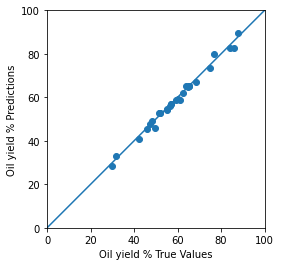

In [9]:
y_pred = model.predict(X_test)

Pred_oil = y_pred[:,0]
test_oil = y_test[:,0]
Pred_char = y_pred[:,1]
test_char = y_test[:,1]
Pred_gas = y_pred[:,2]
test_gas = y_test[:,2]


a = plt.axes(aspect='equal')
plt.scatter(test_oil, Pred_oil)
plt.xlabel('Oil yield % True Values')
plt.ylabel('Oil yield % Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


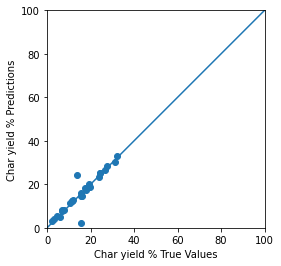

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(test_char, Pred_char)
plt.xlabel('Char yield % True Values')
plt.ylabel('Char yield % Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

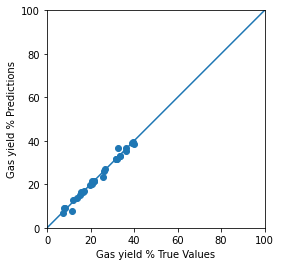

In [12]:
a = plt.axes(aspect='equal')
plt.scatter(test_gas, Pred_gas)
plt.xlabel('Gas yield % True Values')
plt.ylabel('Gas yield % Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)